<a href="https://colab.research.google.com/github/MateusCabrall/Python/blob/main/Mags_Brasa_Burguer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Projeto de Big Data para Empresa Mags Brasa Burguer
 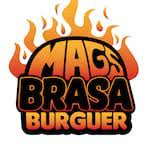

# Importando Bibliotecas

In [40]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import datetime

In [41]:
df= pd.read_excel("Mags brasa Burger.xlsx")

In [42]:
df.head(3)

,ID DO PEDIDO,N° PEDIDO,Data,Hora,Dia da semana,RESTAURANTE,ID DO RESTAURANTE,TAXA DE ENTREGA,VALOR DOS ITENS,INCENTIVO PROMOCIONAL DO IFOOD,...,CONFIRMADO,DATA DE AGENDAMENTO,TIPO DE PEDIDO,AGENDADO,CANAL DE VENDA,TEM CANCELAMENTO PARCIAL,,.1,.2,.3
0,818f126e-3b02-4201-9b26-54c63701b640,8729,29/06/23,22:52:36,quinta-feira,Mags Brasa Burguer,1137743,10,37.0,0.0,...,SIM,NaT,ENTREGA,NÃO,iFood,NÃO,NaN,NaN,********,NaN
1,9267ac27-cfa0-47f1-8091-5a2045d87ab5,7309,29/06/23,20:45:44,quinta-feira,Mags Brasa Burguer,1137743,4,70.8,0.0,...,SIM,NaT,ENTREGA,NÃO,Cardápio Digital,NÃO,NaN,NaN,Apple Pay (Elo),Apple Pay
2,31725d43-2046-4806-85e0-533295ddbd8c,3841,27/06/23,21:29:08,terça-feira,Mags Brasa Burguer,1137743,8,40.3,0.0,...,SIM,NaT,ENTREGA,NÃO,Cardápio Digital,NÃO,NaN,NaN,Apple Pay (Mastercard Débito),Apple Pay


In [43]:
df.columns

Index(['ID DO PEDIDO', 'N° PEDIDO', 'Data', 'Hora', 'Dia da semana',
       'RESTAURANTE', 'ID DO RESTAURANTE', 'TAXA DE ENTREGA',
       'VALOR DOS ITENS', 'INCENTIVO PROMOCIONAL DO IFOOD',
       'INCENTIVO PROMOCIONAL DA LOJA', 'TAXA DE SERVIÇO', 'TOTAL DO PARCEIRO',
       'TOTAL DO PEDIDO', 'FORMAS DE PAGAMENTO', 'FORMAS DE PAGAMENTO 1',
       'DATA DO CANCELAMENTO', 'ORIGEM DO CANCELAMENTO',
       'MOTIVO DO CANCELAMENTO', 'CANCELAMENTO É CONTESTÁVEL',
       'MOTIVO DA IMPOSSIBILIDADE DE CONTESTAR', 'DATA LIMITE DE CONTESTAÇÃO',
       'CONFIRMADO', 'DATA DE AGENDAMENTO', 'TIPO DE PEDIDO', 'AGENDADO',
       'CANAL DE VENDA', 'TEM CANCELAMENTO PARCIAL', ' ', ' .1', ' .2', ' .3'],
      dtype='object')

In [44]:
'''
Criação de 2 df para análises exploratorias
* 1- Analise de vendas, serie temporais e canais de vendas
* 2- Analisar os cancelamentos, os motivos e se é possivel contestar
'''
df_analise_vendas=df[['ID DO PEDIDO','Data','Dia da semana','Hora','TAXA DE ENTREGA','VALOR DOS ITENS','TOTAL DO PEDIDO','FORMAS DE PAGAMENTO','CANAL DE VENDA','MOTIVO DO CANCELAMENTO']].copy()
df_analise_cancelamentos=df[['DATA DO CANCELAMENTO', 'ORIGEM DO CANCELAMENTO','MOTIVO DO CANCELAMENTO', 'CANCELAMENTO É CONTESTÁVEL','MOTIVO DA IMPOSSIBILIDADE DE CONTESTAR', 'DATA LIMITE DE CONTESTAÇÃO']].copy()

In [45]:
df_analise_vendas['Hora'] = pd.to_timedelta(df_analise_vendas['Hora'])
df_analise_vendas['Horas'] = df_analise_vendas['Hora'].dt.total_seconds() // 3600

In [46]:
df_analise_vendas.head(3)

,ID DO PEDIDO,Data,Dia da semana,Hora,TAXA DE ENTREGA,VALOR DOS ITENS,TOTAL DO PEDIDO,FORMAS DE PAGAMENTO,CANAL DE VENDA,MOTIVO DO CANCELAMENTO,Horas
0,818f126e-3b02-4201-9b26-54c63701b640,29/06/23,quinta-feira,0 days 22:52:36,10,37.0,47.0,Crédito,iFood,NaN,22.0
1,9267ac27-cfa0-47f1-8091-5a2045d87ab5,29/06/23,quinta-feira,0 days 20:45:44,4,70.8,74.8,Crédito,Cardápio Digital,NaN,20.0
2,31725d43-2046-4806-85e0-533295ddbd8c,27/06/23,terça-feira,0 days 21:29:08,8,40.3,48.3,Débito,Cardápio Digital,NaN,21.0


In [47]:
df_analise_vendas.dtypes

ID DO PEDIDO                       object
Data                               object
Dia da semana                      object
Hora                      timedelta64[ns]
TAXA DE ENTREGA                     int64
VALOR DOS ITENS                   float64
TOTAL DO PEDIDO                   float64
FORMAS DE PAGAMENTO                object
CANAL DE VENDA                     object
MOTIVO DO CANCELAMENTO             object
Horas                             float64
dtype: object

In [60]:
# value_counts para contar a quantidade de ocorrências de cada dia da semana.
quantidade_por_dia = df_analise_vendas['Dia da semana'].value_counts()

# groupby para calcular a soma do 'TOTAL DO PEDIDO' para cada dia da semana.
soma_total_por_dia = df_analise_vendas.groupby('Dia da semana')['TOTAL DO PEDIDO'].sum()

# DataFrame a partir dos resultados.
count_dia = pd.DataFrame({
    'Dia da semana': quantidade_por_dia.index,
    'Quantidade': quantidade_por_dia.values,
    'Soma Total do Pedido': soma_total_por_dia[quantidade_por_dia.index].values
})
print(count_dia)


   Dia da semana  Quantidade  Soma Total do Pedido
0        domingo         187               9716.45
1         sábado         149               7791.37
2    sexta-feira         127               7119.98
3   quinta-feira         120               5614.82
4  segunda-feira          86               4171.98
5   quarta-feira          76               3833.52
6    terça-feira          71               3442.21


# Gráfico de faturamento nos dias da Semana

In [50]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Criar os gráficos individualmente
fig_line = px.line(count_dia, x='Dia da semana', y='Soma Total do Pedido',text='Soma Total do Pedido',
                   )

fig_bar = px.bar(count_dia, x='Dia da semana', y='Quantidade',
                 color='Quantidade')

fig_line.update_traces(texttemplate='R$%{y}', mode='lines+markers+text', textposition='top center')

# Criar o subplot
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1,
                    )

# Adicionar os gráficos ao subplot
fig.add_trace(fig_bar.data[0], row=2, col=1)
fig.add_trace(fig_line.data[0], row=1, col=1)

# Atualizar o layout do subplot
fig.update_layout(title='Dias com mais vendas e Soma Total do Pedido <br><sub> O Domingo é o dia com maior quantidade de vendas', height=800, width=1000)

fig_bar.update_yaxes(range=[0, 200])

# Atualizar os rótulos dos eixos
fig.update_xaxes(title_text='Dia da semana', row=2, col=1)

fig.show()

# Gráfico Quantidade de vendas x hora da semana

In [59]:
pivot_table = df_analise_vendas.pivot_table(index='Dia da semana', columns='Horas', values='ID DO PEDIDO', aggfunc='count')
colorscale1 = [[0, "rgb(166,206,227)"],
               [0.25, "rgb(31,120,180)"],
               [0.45, "rgb(178,223,138)"],
               [0.65, "rgb(51,160,44)"],
               [0.85, "rgb(251,154,153)"],
               [1, "rgb(227,26,28)"]]

# Criar o heatmap
fig = go.Figure(data=go.Heatmap(
                   z=pivot_table.values,
                   x=pivot_table.columns,
                   y=pivot_table.index,
                   colorscale=colorscale1))
fig.update_xaxes(range=[0, 24])

# título e rótulos
fig.update_layout(title='Comportamento de Compra por Dia da Semana e Horas<br><sub>As vendas são impulsionadas a partir de 19:00h',
                  xaxis_title='Horas e Minutos',
                  yaxis_title='Dia da Semana')

fig.show()

In [52]:
print(pivot_table)

Horas          1.0   4.0   11.0  12.0  13.0  14.0  17.0  18.0  19.0  20.0  \
Dia da semana                                                               
domingo         NaN   NaN   NaN   NaN   NaN   NaN   1.0  19.0  35.0  44.0   
quarta-feira    NaN   NaN   NaN   NaN   1.0   NaN   2.0   5.0  15.0  14.0   
quinta-feira    NaN   NaN   NaN   1.0   1.0   1.0   NaN  14.0  21.0  23.0   
segunda-feira   NaN   1.0   2.0   1.0   NaN   NaN   NaN   5.0  14.0  19.0   
sexta-feira     NaN   NaN   NaN   1.0   1.0   1.0   1.0   5.0  22.0  21.0   
sábado          1.0   NaN   NaN   NaN   NaN   NaN   NaN   8.0  31.0  22.0   
terça-feira     NaN   NaN   NaN   1.0   3.0   1.0   NaN   4.0   7.0  15.0   

Horas          21.0  22.0  23.0  
Dia da semana                    
domingo        33.0  35.0  20.0  
quarta-feira   20.0  11.0   8.0  
quinta-feira   22.0  22.0  15.0  
segunda-feira  15.0  13.0  16.0  
sexta-feira    27.0  27.0  21.0  
sábado         29.0  31.0  27.0  
terça-feira    12.0  16.0  12.0  


In [53]:
out = df_analise_vendas[df_analise_vendas['Horas'] == 4]
display(out)

,ID DO PEDIDO,Data,Dia da semana,Hora,TAXA DE ENTREGA,VALOR DOS ITENS,TOTAL DO PEDIDO,FORMAS DE PAGAMENTO,CANAL DE VENDA,MOTIVO DO CANCELAMENTO,Horas
153,cb7ce734-fe85-4483-8986-a3311b9e4aa6,31/07/23,segunda-feira,0 days 04:59:05,7,32.0,39.99,Apple Pay,iFood,O pedido foi acidental,4.0


- A cima podemos ver que no horário  das 4:49, foi um pedido que foi cancelado pois foi um pedido acidental

In [54]:
df_analise_vendas['nova_data'] = pd.to_datetime(df_analise_vendas['Data'], format='%d/%m/%y').dt.strftime('%Y-%m-%d')

# Quantidade de Pedidos por mês


In [55]:
import pandas as pd
import plotly.express as px

# Convertendo 'nova_data' para formato de data
df_analise_vendas['nova_data'] = pd.to_datetime(df_analise_vendas['nova_data'])

# Agregar por mês e contar os pedidos
df_pedidos_por_mes = df_analise_vendas.groupby(df_analise_vendas['nova_data'].dt.to_period("M"))['ID DO PEDIDO'].count().reset_index()

# Convertendo a coluna 'nova_data' de Period para string no formato 'YYYY-MM'
df_pedidos_por_mes['nova_data'] = df_pedidos_por_mes['nova_data'].dt.to_timestamp().dt.strftime('%Y-%m')

# Criar o gráfico de linhas
fig = px.line(df_pedidos_por_mes, x='nova_data', y='ID DO PEDIDO', title='Número de Pedidos por Mês')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="2m", step="month", stepmode="backward"),
            dict(count=6, label="3m", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )
)

# Definir o intervalo inicial para cobrir os meses de junho a dezembro de 2023
fig.update_xaxes(range=['2023-06', '2023-12'])
fig.update_yaxes(range=[0, 300])

# Adicionar rótulos com o número de pedidos
for i, row in df_pedidos_por_mes.iterrows():
    fig.add_trace(
        go.Scatter(
            x=[row['nova_data']],
            y=[row['ID DO PEDIDO']],
            mode='text',
            text=str(row['ID DO PEDIDO']),
            textposition='top center'
        )
    )


fig.show()

In [58]:
grupo = df_analise_vendas.groupby(['CANAL DE VENDA', 'FORMAS DE PAGAMENTO']).size().reset_index(name='Contagem')

# Criando o gráfico de barras agrupado
fig = px.bar(grupo, x='FORMAS DE PAGAMENTO', y='Contagem', color='CANAL DE VENDA',
             barmode='group', labels={'CANAL DE VENDA': 'Canal de Venda'},
             title='Formas de Pagamento por Canal de Venda<br><sub>Podemos notar que o cardápio digital o pagamento por dinheiro possui menos descontos<br>Por outro lado o iFood proporciona mais opções de pagamento')

# Mostrando o gráfico
fig.show()

- No gráfico a cima podemos tirar a conclusão que o canal de de vendas pelo cardápio Digital é melhor financeiramente para a empresa pois os pagamentos são feitos em maioria por dinheiro e pix, não havendo taxa extra das maquinas de cartão.
- Por outro ladoo Ifood fornece mais opções de pagamentos sendo um otima oportunidade para atrair clientes novos.

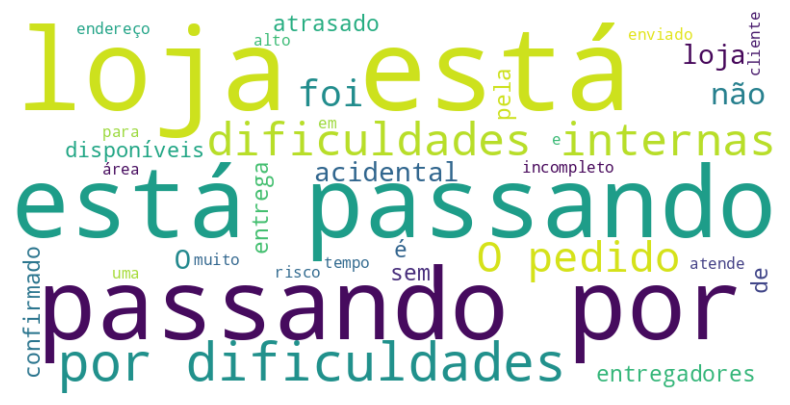

In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Filtrando os valores NaN da coluna 'MOTIVO DO CANCELAMENTO'
motivos_cancelamento = df_analise_cancelamentos['MOTIVO DO CANCELAMENTO'].dropna()

# Junte todos os textos em uma única string
texto = ' '.join(motivos_cancelamento)

# Crie a nuvem de palavras sem especificar uma fonte
nuvem_palavras = WordCloud(width=800, height=400, background_color='white',
                           contour_color='steelblue', colormap='viridis',
                           max_words=200).generate(texto)

# Plote a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()
